### Connecting with MongoDB

In [1]:
import pandas as pd
import pymongo
from pymongo import MongoClient
from pandas.io.json import json_normalize
import math
from numpy import nan
import numpy as np
import json

from sshtunnel import SSHTunnelForwarder

with open('config.json', 'r') as file:
    config_data = json.load(file)

server = SSHTunnelForwarder(
    config_data['VM_IP'],
    ssh_username=config_data['REDDIT_USER_NAME'],
    ssh_password=config_data['VM_PASSWORD'],
    remote_bind_address=(config_data['MONGO_HOSTIP'], config_data['MONGO_PORTNUMBER'])
)

server.start()

client=pymongo.MongoClient(config_data['MONGO_HOSTIP'],server.local_bind_port)
mydb=client['movieData']
tmdb_collection=mydb['tmdb_data']
tmdb_reviews=mydb['tmdb_reviews']

KeyError: 'MONGO_HOSTIP'

### Making Pickle File and Dataframe for TMDB collection

In [164]:
datapoints = list(tmdb_collection.find({}))
dataframe = json_normalize(datapoints)
dataframe.to_pickle("tmdb_data.pkl")
#Creating dataframe from pickle file
df_tmdb=pd.read_pickle("tmdb_data.pkl")
df_tmdb.head()

,_id,id,adult,title,overview,popularity,vote_average,vote_count,created_date,movie_details.adult,...,movie_details.status,movie_details.tagline,movie_details.title,movie_details.video,movie_details.vote_average,movie_details.vote_count,movie_details.belongs_to_collection.id,movie_details.belongs_to_collection.name,movie_details.belongs_to_collection.poster_path,movie_details.belongs_to_collection.backdrop_path
0,6541b187d5889c25bf46a36f,507089,False,Five Nights at Freddy's,"Recently fired and desperate for work, a troub...",7124.811,8.469,1012,2023-11-01 02:01:43.477,False,...,Released,Can you survive five nights?,Five Nights at Freddy's,False,8.479,1002,NaN,NaN,NaN,NaN
1,6541b187d5889c25bf46a370,968051,False,The Nun II,"In 1956 France, a priest is violently murdered...",2558.391,6.973,1211,2023-11-01 02:01:43.548,False,...,Released,Confess your sins.,The Nun II,False,6.975,1208,968052.0,The Nun Collection,/2RLAPEbafIFG7J8FV9h1lKWNYBU.jpg,/bKpqH9y3SjovMM3VqzezBbJtuf7.jpg
2,6541b187d5889c25bf46a371,951491,False,Saw X,"Between the events of 'Saw' and 'Saw II', a si...",2473.173,7.366,626,2023-11-01 02:01:43.622,False,...,Released,Witness the return of Jigsaw.,Saw X,False,7.370,627,656.0,Saw Collection,/xmC2A7qPEfiOkQC58fZh8srWQ5v.jpg,/oLfS1lOmN2KIU2IQ200SDEPVEZe.jpg
3,6541b187d5889c25bf46a372,807172,False,The Exorcist: Believer,When his daughter and her friend show signs of...,2315.215,6.100,344,2023-11-01 02:01:43.703,False,...,Released,Do you believe?,The Exorcist: Believer,False,6.144,344,12263.0,The Exorcist Collection,/uPTu5kroKS6lHm6TKncIzVgwW2o.jpg,/tuORKw8hnP7Gd03BdBV6TmySR2G.jpg
4,6541b187d5889c25bf46a373,385687,False,Fast X,Over many missions and against impossible odds...,1890.122,7.245,4090,2023-11-01 02:01:43.773,False,...,Released,The end of the road begins.,Fast X,False,7.245,4090,9485.0,The Fast and the Furious Collection,/zQdytnqfsWKJlqazqfMBL2L7aql.jpg,/z5A5W3WYJc3UVEWljSGwdjDgQ0j.jpg


In [165]:
rows=df_tmdb.shape[0]
tmdb_collection.count_documents({})
df = df_tmdb[['id','title','movie_details.release_date','movie_details.genres','movie_details.runtime','overview','movie_details.production_companies','movie_details.status','popularity']]
df.head()

,id,title,movie_details.release_date,movie_details.genres,movie_details.runtime,overview,movie_details.production_companies,movie_details.status,popularity
0,507089,Five Nights at Freddy's,2023-10-25,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",110,"Recently fired and desperate for work, a troub...","[{'id': 3172, 'logo_path': '/kDedjRZwO8uyFhuHa...",Released,7124.811
1,968051,The Nun II,2023-09-06,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",110,"In 1956 France, a priest is violently murdered...","[{'id': 12, 'logo_path': '/mevhneWSqbjU22D1MXN...",Released,2558.391
2,951491,Saw X,2023-09-26,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",118,"Between the events of 'Saw' and 'Saw II', a si...","[{'id': 2061, 'logo_path': '/o9LbN33hRaj4qcebU...",Released,2473.173
3,807172,The Exorcist: Believer,2023-10-04,"[{'id': 27, 'name': 'Horror'}]",111,When his daughter and her friend show signs of...,"[{'id': 3172, 'logo_path': '/kDedjRZwO8uyFhuHa...",Released,2315.215
4,385687,Fast X,2023-05-17,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",142,Over many missions and against impossible odds...,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",Released,1890.122


In [166]:
df.rename(columns={'movie_details.release_date':'release_date','movie_details.genres': 'genre', 'movie_details.production_companies':'production_companies','movie_details.status':'status','movie_details.runtime':'runtime'}, inplace=True)
df.tail()

,id,title,release_date,genre,runtime,overview,production_companies,status,popularity
13859,232391,ขังแปด,2002-11-03,"[{'id': 18, 'name': 'Drama'}]",104,Dao was life sentenced from the guilty of murd...,"[{'id': 4207, 'logo_path': '/v5BSFwIXQmZEO16bC...",Released,11.926
13860,522887,Manou the Swift,2019-01-25,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",88,The little swift Manou grows up believing he's...,"[{'id': 104316, 'logo_path': None, 'name': 'LU...",Released,10.793
13861,43089,Roadgames,1981-02-27,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",101,A truck driver plays a cat-and-mouse game with...,"[{'id': 15099, 'logo_path': None, 'name': 'Ess...",Released,14.993
13862,571419,Спасти Ленинград,2019-01-31,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",96,"September, 1941. In a turn of events, young lo...","[{'id': 117793, 'logo_path': None, 'name': 'St...",Released,19.272
13863,84341,Smashed,2012-01-22,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",85,Kate and Charlie like to have a good time. The...,"[{'id': 13369, 'logo_path': '/2NW3USs9SqdAToZH...",Released,22.238


### Making a list of unique genre

In [167]:
df['genre'] = df['genre'].fillna(0)
genre_type_list=[]
for r in range(0,rows):
    el=df['genre'][r]
    if el==0 or el==[]:
        print("got a 0")
        continue
    else:
        for e in el:
            genre_type=(e['name'])
            if genre_type not in genre_type_list:
                genre_type_list.append(e['name'])

got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0


### Total of 19 genre types

In [168]:
print(genre_type_list)
print("Total genre types:",len(genre_type_list))

['Horror', 'Mystery', 'Thriller', 'Action', 'Crime', 'Adventure', 'Drama', 'Family', 'Animation', 'Fantasy', 'Comedy', 'Music', 'Science Fiction', 'War', 'History', 'Romance', 'TV Movie', 'Western', 'Documentary']
Total genre types: 19


In [169]:
for r in range(0,rows):
    if df['genre'][r]==0:
        df['genre'][r]=[]
    else:
        genre_ls=[]
    
        for g in df['genre'][r]:
            genre_ls.append(g['name'])
        
        
        if len(genre_ls)>0:
            df['genre'][r]=genre_ls
        else:
            df['genre'][r]=[]
        #print(len(genre_ls))
        print(genre_ls) 

['Horror', 'Mystery']
['Horror', 'Mystery', 'Thriller']
['Horror', 'Thriller']
['Horror']
['Action', 'Crime', 'Thriller']
['Action', 'Thriller', 'Crime']
['Action', 'Thriller', 'Crime']
['Action', 'Adventure', 'Thriller']
['Action', 'Thriller']
['Adventure', 'Action', 'Drama']
['Action', 'Drama']
['Action', 'Crime', 'Drama', 'Thriller']
['Action', 'Crime', 'Drama', 'Thriller']
['Family', 'Animation', 'Fantasy', 'Comedy']
['Family', 'Animation', 'Fantasy', 'Music', 'Comedy', 'Adventure']
['Action', 'Science Fiction', 'Horror']
['Action', 'Drama', 'War']
['Horror', 'Thriller']
['Drama']
['Action', 'Science Fiction', 'Adventure']
['Animation', 'Family', 'Action', 'Science Fiction']
['Animation', 'Adventure', 'Family', 'Fantasy']
['Action', 'Thriller']
['Action', 'War']
['Drama', 'History']
['Action', 'Adventure', 'Science Fiction']
['Action', 'Comedy', 'Crime']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Drama', 'Crime']
['Science Fiction', 'Adventure', 'Action']
['

### Hot encoding the unique genre types

In [170]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df
genre_df=pd.concat([
    pd.DataFrame(mlb.fit_transform(df['genre']), columns=mlb.classes_),
], 1)
df.join(genre_df)

,id,title,release_date,genre,runtime,overview,production_companies,status,popularity,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,507089,Five Nights at Freddy's,2023-10-25,"[Horror, Mystery]",110,"Recently fired and desperate for work, a troub...","[{'id': 3172, 'logo_path': '/kDedjRZwO8uyFhuHa...",Released,7124.811,0,...,0,1,0,1,0,0,0,0,0,0
1,968051,The Nun II,2023-09-06,"[Horror, Mystery, Thriller]",110,"In 1956 France, a priest is violently murdered...","[{'id': 12, 'logo_path': '/mevhneWSqbjU22D1MXN...",Released,2558.391,0,...,0,1,0,1,0,0,0,1,0,0
2,951491,Saw X,2023-09-26,"[Horror, Thriller]",118,"Between the events of 'Saw' and 'Saw II', a si...","[{'id': 2061, 'logo_path': '/o9LbN33hRaj4qcebU...",Released,2473.173,0,...,0,1,0,0,0,0,0,1,0,0
3,807172,The Exorcist: Believer,2023-10-04,[Horror],111,When his daughter and her friend show signs of...,"[{'id': 3172, 'logo_path': '/kDedjRZwO8uyFhuHa...",Released,2315.215,0,...,0,1,0,0,0,0,0,0,0,0
4,385687,Fast X,2023-05-17,"[Action, Crime, Thriller]",142,Over many missions and against impossible odds...,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",Released,1890.122,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,232391,ขังแปด,2002-11-03,[Drama],104,Dao was life sentenced from the guilty of murd...,"[{'id': 4207, 'logo_path': '/v5BSFwIXQmZEO16bC...",Released,11.926,0,...,0,0,0,0,0,0,0,0,0,0
13860,522887,Manou the Swift,2019-01-25,"[Animation, Adventure, Family, Comedy]",88,The little swift Manou grows up believing he's...,"[{'id': 104316, 'logo_path': None, 'name': 'LU...",Released,10.793,0,...,0,0,0,0,0,0,0,0,0,0
13861,43089,Roadgames,1981-02-27,"[Horror, Mystery, Thriller]",101,A truck driver plays a cat-and-mouse game with...,"[{'id': 15099, 'logo_path': None, 'name': 'Ess...",Released,14.993,0,...,0,1,0,1,0,0,0,1,0,0
13862,571419,Спасти Ленинград,2019-01-31,"[Drama, War]",96,"September, 1941. In a turn of events, young lo...","[{'id': 117793, 'logo_path': None, 'name': 'St...",Released,19.272,0,...,0,0,0,0,0,0,0,0,1,0


In [171]:
df=df.join(genre_df)
for col in df:
    print(col)

id
title
release_date
genre
runtime
overview
production_companies
status
popularity
Action
Adventure
Animation
Comedy
Crime
Documentary
Drama
Family
Fantasy
History
Horror
Music
Mystery
Romance
Science Fiction
TV Movie
Thriller
War
Western


## Descriptive Analysis


### 1. Movies with maximum runtime and its details

In [172]:
movie_info = df.loc[df['runtime'].idxmax()]
max_runtime = df.max()['runtime']
print(max_runtime)
print(movie_info)

432
id                                                                  31414
title                                                          Sátántangó
release_date                                                   1994-02-08
genre                                                             [Drama]
runtime                                                               432
overview                Inhabitants of a small village in Hungary deal...
production_companies    [{'id': 5132, 'logo_path': None, 'name': 'Von ...
status                                                           Released
popularity                                                         18.101
Action                                                                  0
Adventure                                                               0
Animation                                                               0
Comedy                                                                  0
Crime                             

### 2. Movies with minimum runtime and its details

In [173]:
movie_min_info = df.loc[df['runtime'].idxmin()]
min_runtime = df.min()['runtime']
print(min_runtime)
print(movie_min_info)

0
id                                                                 562971
title                                RSC Live: The Merry Wives of Windsor
release_date                                                   2018-09-12
genre                                                                  []
runtime                                                                 0
overview                Down on his luck in the suburbs, John Falstaff...
production_companies    [{'id': 5845, 'logo_path': None, 'name': 'Roya...
status                                                           Released
popularity                                                        204.767
Action                                                                  0
Adventure                                                               0
Animation                                                               0
Comedy                                                                  0
Crime                               

### 3. Most popular movies and its details

In [174]:
most_popular_movie = df.loc[df['popularity'].idxmax()]
most_popular = df.max()['popularity']
print(most_popular)
print(most_popular_movie)

7124.811
id                                                                 507089
title                                             Five Nights at Freddy's
release_date                                                   2023-10-25
genre                                                   [Horror, Mystery]
runtime                                                               110
overview                Recently fired and desperate for work, a troub...
production_companies    [{'id': 3172, 'logo_path': '/kDedjRZwO8uyFhuHa...
status                                                           Released
popularity                                                       7124.811
Action                                                                  0
Adventure                                                               0
Animation                                                               0
Comedy                                                                  0
Crime                        

### 4. Least popular movie and its details

In [175]:
min_popular_movie = df.loc[df['popularity'].idxmin()]
min_popular = df.min()['popularity']
print(min_popular)
print(min_popular_movie)

7.959
id                                                                  10154
title                                                    Mickey Blue Eyes
release_date                                                   1999-08-16
genre                                            [Comedy, Crime, Romance]
runtime                                                               102
overview                An English auctioneer proposes to the daughter...
production_companies    [{'id': 97, 'logo_path': '/qv3ih9pR9w2XNKZDsqD...
status                                                           Released
popularity                                                          7.959
Action                                                                  0
Adventure                                                               0
Animation                                                               0
Comedy                                                                  1
Crime                           

## Preprocessing Status Column

### 1. Counting unique status types present in our dataset

In [176]:
status_list=[]

for each_status in df['status']:
    if each_status not in status_list:
        status_list.append(each_status)


new_list = [item for item in status_list if not(pd.isnull(item)) == True]
print(new_list)

['Released', 'Post Production', 'In Production', 'Planned']


### 2. Counting the number of movies released"

In [177]:
c=0
r=0
returning_series_ls=[]
for each_tv_status in df['status']:
        
    if each_tv_status=="Released":
        print(df['title'][r])
        returning_series_ls.append(df['title'][r])
        c+=1
    r+=1
len(returning_series_ls)

Five Nights at Freddy's
The Nun II
Saw X
The Exorcist: Believer
Fast X
The Equalizer 3
Retribution
Expend4bles
Mission: Impossible - Dead Reckoning Part One
Gran Turismo
Sound of Freedom
Muzzle
Desperation Road
Once Upon a Studio
Coco
Meg 2: The Trench
Uri: The Surgical Strike
Talk to Me
Sila Ay Akin
Blue Beetle
PAW Patrol: The Mighty Movie
Мавка: Лісова пісня
Sniper: G.R.I.T. - Global Response & Intelligence Team
Boudica
Oppenheimer
The Marvels
Sentinelle
Babylon A.D.
The Baker
Space Wars: Quest for the Deepstar
Breakout
Barbie
Elemental
ナックルガール
After Everything
Texas Chainsaw 3D
Transformers: Rise of the Beasts
Sanctuary
ആര്‍ഡിഎക്സ്: റോബര്‍ട്ട് ഡോണി സേവ്യര്‍
Teenage Mutant Ninja Turtles: Mutant Mayhem
Meteor Storm
Night Train
Inside Out
Spider-Man: Across the Spider-Verse
ワンピース エピソード オブ 空島
Nowhere
The Super Mario Bros. Movie
John Wick: Chapter 4
Rien à foutre
검객
Cuando acecha la maldad
The Flash
Agnes
The Killer
57 Seconds
Thriller Night
Indiana Jones and the Dial of Destiny
The Engi

13785

In [178]:
df = pd.get_dummies(df, columns = ['status'])

## Preprocessing Production Companies column

In [179]:
df['production_companies'] = df['production_companies'].fillna(0)

Collecting the frquencies of each production company

In [180]:
production_companies=[]
prod_companies_freq = {}
for r in range(0,rows):
    if df['production_companies'][r]==0:
        continue
    else:
        for p in df['production_companies'][r]:
        
            if p['name'] not in production_companies:
                production_companies.append(p['name'])
            if p['name'] not in prod_companies_freq:
                prod_companies_freq[p['name']] = 1
            else:
                prod_companies_freq[p['name']]+=1
print(len(set(production_companies)))

13041


### List of top 20 production companies

In [181]:
sorted_prod_companies_freq = sorted(prod_companies_freq.items(), key=lambda x:x[1], reverse=True)
final_prod_list=[]
c=0
for items in sorted_prod_companies_freq:
    if c==20:
        break
    c+=1
    final_prod_list.append(items)

final_prod_names=[]
for element in final_prod_list:
    final_prod_names.append(element[0])
print("FINAL PROD NAMES")
print(final_prod_names)

FINAL PROD NAMES
['Warner Bros. Pictures', 'Universal Pictures', 'Columbia Pictures', 'Paramount', '20th Century Fox', 'Walt Disney Pictures', 'Metro-Goldwyn-Mayer', 'Lionsgate', 'New Line Cinema', 'Canal+', 'United Artists', 'StudioCanal', 'TOHO', 'Warner Bros. Animation', 'Touchstone Pictures', 'Miramax', 'Summit Entertainment', 'Relativity Media', 'Focus Features', 'Film4 Productions']


### Extracting just the prod names and adding the list of names to every movie row

In [182]:
for r in range(0,rows):
    if df['production_companies'][r]==0:
        df['production_companies'][r]=[]
    else:
        prod_ls=[]
    
        for p in df['production_companies'][r]:
            prod_ls.append(p['name'])
        
        
        if len(prod_ls)>0:
            df['production_companies'][r]=prod_ls
        else:
            df['production_companies'][r]=[]
        
        print(prod_ls)

['Blumhouse Productions', 'Scott Cawthon Productions']
['New Line Cinema', 'Atomic Monster', 'The Safran Company']
['Twisted Pictures', 'Lionsgate']
['Blumhouse Productions', 'Morgan Creek', 'Rough House Pictures', 'Universal Pictures']
['Universal Pictures', 'Original Film', 'One Race', 'Perfect Storm Entertainment']
['Escape Artists', 'Columbia Pictures', 'Eagle Pictures', 'ZHIV Productions']
['StudioCanal', 'The Picture Company', 'Ombra Films', 'Lionsgate']
['Millennium Media', 'Campbell Grobman Films', 'Lionsgate']
['Paramount', 'Skydance', 'TC Productions']
['PlayStation Productions', '2.0 Entertainment', 'Columbia Pictures']
['Santa Fe Films']
['Highland Film Group', 'Broken Open Pictures', 'Slow Burn', 'Studio507']
['Grindstone Entertainment Group', 'Capstone Pictures', 'Elevated Films', 'Hopeful Romantix Productions']
['Walt Disney Animation Studios', 'Walt Disney Pictures']
['Pixar', 'Walt Disney Pictures']
['Apelles Entertainment', 'Warner Bros. Pictures', 'di Bonaventura Pic

In [183]:
for company in df['production_companies'][0]:
    print(company)
print(type(final_prod_names))

Blumhouse Productions
Scott Cawthon Productions
<class 'list'>


### Keeping just the top 20 production company names in the row

In [184]:
for r in range(0,rows):
    if df['production_companies'][r]==[]:
        continue
    else:
        new_prod_list=[]
        for company in df['production_companies'][r]:
            if company in final_prod_names:
                new_prod_list.append(company)
        if len(new_prod_list)>0:
            df['production_companies'][r]=new_prod_list
        else:
            df['production_companies'][r]=[]
        print("row added for ",r)

row added for  0
row added for  1
row added for  2
row added for  3
row added for  4
row added for  5
row added for  6
row added for  7
row added for  8
row added for  9
row added for  10
row added for  11
row added for  12
row added for  13
row added for  14
row added for  15
row added for  16
row added for  17
row added for  18
row added for  19
row added for  20
row added for  21
row added for  22
row added for  23
row added for  24
row added for  25
row added for  26
row added for  27
row added for  28
row added for  29
row added for  30
row added for  31
row added for  32
row added for  33
row added for  34
row added for  35
row added for  36
row added for  37
row added for  38
row added for  39
row added for  40
row added for  42
row added for  43
row added for  44
row added for  45
row added for  46
row added for  47
row added for  48
row added for  49
row added for  50
row added for  51
row added for  52
row added for  53
row added for  54
row added for  55
row added for  56
ro

In [185]:
backup_df=df
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
prod_company_df=pd.concat([
    pd.DataFrame(mlb.fit_transform(df['production_companies']), columns=mlb.classes_),
], 1)

### Changing Default Release Date

In [186]:
df['release_date']=df['release_date'].replace(np.nan, '2020-12-12')

### Changing the position of "Popularity" column to the 1st column

In [187]:
indep_column = df.pop('popularity')
df.insert(1, 'Popularity', indep_column)
display(df)

,id,Popularity,title,release_date,genre,runtime,overview,production_companies,Action,Adventure,...,Romance,Science Fiction,TV Movie,Thriller,War,Western,status_In Production,status_Planned,status_Post Production,status_Released
0,507089,7124.811,Five Nights at Freddy's,2023-10-25,"[Horror, Mystery]",110,"Recently fired and desperate for work, a troub...",[],0,0,...,0,0,0,0,0,0,0,0,0,1
1,968051,2558.391,The Nun II,2023-09-06,"[Horror, Mystery, Thriller]",110,"In 1956 France, a priest is violently murdered...",[New Line Cinema],0,0,...,0,0,0,1,0,0,0,0,0,1
2,951491,2473.173,Saw X,2023-09-26,"[Horror, Thriller]",118,"Between the events of 'Saw' and 'Saw II', a si...",[Lionsgate],0,0,...,0,0,0,1,0,0,0,0,0,1
3,807172,2315.215,The Exorcist: Believer,2023-10-04,[Horror],111,When his daughter and her friend show signs of...,[Universal Pictures],0,0,...,0,0,0,0,0,0,0,0,0,1
4,385687,1890.122,Fast X,2023-05-17,"[Action, Crime, Thriller]",142,Over many missions and against impossible odds...,[Universal Pictures],1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,232391,11.926,ขังแปด,2002-11-03,[Drama],104,Dao was life sentenced from the guilty of murd...,[],0,0,...,0,0,0,0,0,0,0,0,0,1
13860,522887,10.793,Manou the Swift,2019-01-25,"[Animation, Adventure, Family, Comedy]",88,The little swift Manou grows up believing he's...,[],0,1,...,0,0,0,0,0,0,0,0,0,1
13861,43089,14.993,Roadgames,1981-02-27,"[Horror, Mystery, Thriller]",101,A truck driver plays a cat-and-mouse game with...,[],0,0,...,0,0,0,1,0,0,0,0,0,1
13862,571419,19.272,Спасти Ленинград,2019-01-31,"[Drama, War]",96,"September, 1941. In a turn of events, young lo...",[],0,0,...,0,0,0,0,1,0,0,0,0,1


In [188]:
backup_df=df
for x in range(len(genre_type_list)):
    og_column_name=genre_type_list[x]
    new_col_name="Genre_"+genre_type_list[x]
    df.rename(columns = {og_column_name: new_col_name}, 
          inplace = True)
for col in newdf:
    print(col)
df.pop('genre')

Popularity
release_date
genre
movie_details.runtime
overview
production_companies
Genre_Action
Genre_Adventure
Genre_Animation
Genre_Comedy
Genre_Crime
Genre_Documentary
Genre_Drama
Genre_Family
Genre_Fantasy
Genre_History
Genre_Horror
Genre_Music
Genre_Mystery
Genre_Romance
Genre_Science Fiction
Genre_TV Movie
Genre_Thriller
Genre_War
Genre_Western
status_In Production
status_Planned
status_Post Production
status_Released
ProdComp_20th Century Fox
ProdComp_Canal+
ProdComp_Columbia Pictures
ProdComp_Film4 Productions
ProdComp_Focus Features
ProdComp_Lionsgate
ProdComp_Metro-Goldwyn-Mayer
ProdComp_Miramax
ProdComp_New Line Cinema
ProdComp_Paramount
ProdComp_Relativity Media
ProdComp_StudioCanal
ProdComp_Summit Entertainment
ProdComp_TOHO
ProdComp_Touchstone Pictures
ProdComp_United Artists
ProdComp_Universal Pictures
ProdComp_Walt Disney Pictures
ProdComp_Warner Bros. Animation
ProdComp_Warner Bros. Pictures


0                             [Horror, Mystery]
1                   [Horror, Mystery, Thriller]
2                            [Horror, Thriller]
3                                      [Horror]
4                     [Action, Crime, Thriller]
                          ...                  
13859                                   [Drama]
13860    [Animation, Adventure, Family, Comedy]
13861               [Horror, Mystery, Thriller]
13862                              [Drama, War]
13863                           [Comedy, Drama]
Name: genre, Length: 13864, dtype: object

In [189]:
for x in range(len(final_prod_names)):
    og_column_name=final_prod_names[x]
    new_col_name="ProdComp_"+final_prod_names[x]
    df.rename(columns = {og_column_name: new_col_name}, 
          inplace = True)
for col in df:
    print(col)

dataframe=df

id
Popularity
title
release_date
runtime
overview
production_companies
Genre_Action
Genre_Adventure
Genre_Animation
Genre_Comedy
Genre_Crime
Genre_Documentary
Genre_Drama
Genre_Family
Genre_Fantasy
Genre_History
Genre_Horror
Genre_Music
Genre_Mystery
Genre_Romance
Genre_Science Fiction
Genre_TV Movie
Genre_Thriller
Genre_War
Genre_Western
status_In Production
status_Planned
status_Post Production
status_Released


### Popping out other not required columns

In [190]:
for col in dataframe:
    print(col)

id
Popularity
title
release_date
runtime
overview
production_companies
Genre_Action
Genre_Adventure
Genre_Animation
Genre_Comedy
Genre_Crime
Genre_Documentary
Genre_Drama
Genre_Family
Genre_Fantasy
Genre_History
Genre_Horror
Genre_Music
Genre_Mystery
Genre_Romance
Genre_Science Fiction
Genre_TV Movie
Genre_Thriller
Genre_War
Genre_Western
status_In Production
status_Planned
status_Post Production
status_Released


In [191]:
dataframe.pop('production_companies')
dataset=dataframe
dataset.pop('overview')
dataset.pop('release_date')
dataset.pop('id')
dataset.pop('title')
dataframe.shape

(13864, 25)

## Model training and Testing

In [192]:
for col in dataset:
    print(col)

Popularity
runtime
Genre_Action
Genre_Adventure
Genre_Animation
Genre_Comedy
Genre_Crime
Genre_Documentary
Genre_Drama
Genre_Family
Genre_Fantasy
Genre_History
Genre_Horror
Genre_Music
Genre_Mystery
Genre_Romance
Genre_Science Fiction
Genre_TV Movie
Genre_Thriller
Genre_War
Genre_Western
status_In Production
status_Planned
status_Post Production
status_Released


### Replacing the Nan values from popularity column to its mean values

In [193]:
dataset['Popularity'].isnull().sum()

mean_value=dataset['Popularity'].mean()
dataset['Popularity']=dataset['Popularity'].fillna(mean_value)
print(mean_value)
dep_var=dataset.iloc[:,:1]
indep_var=dataset.iloc[:,1::]

30.220855813618005


In [194]:
indep_var

,runtime,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,...,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western,status_In Production,status_Planned,status_Post Production,status_Released
0,110,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,110,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,118,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,142,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,104,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
13860,88,0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
13861,101,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13862,96,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [195]:
(dep_var)

,Popularity
0,7124.811
1,2558.391
2,2473.173
3,2315.215
4,1890.122
...,...
13859,11.926
13860,10.793
13861,14.993
13862,19.272


In [196]:
dep_var['Popularity']

0        7124.811
1        2558.391
2        2473.173
3        2315.215
4        1890.122
           ...   
13859      11.926
13860      10.793
13861      14.993
13862      19.272
13863      22.238
Name: Popularity, Length: 13864, dtype: float64

## Normalizing few columns

In [197]:
x=indep_var
y=dep_var
dff=pd.DataFrame()
def absolute_maximum_scale(series):
    return series / series.abs().max()
indep_var['runtime'] = absolute_maximum_scale(indep_var['runtime'])
dep_var['Popularity'] = absolute_maximum_scale(dep_var['Popularity'])

### Splitting the training and testing dataset

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(indep_var, dep_var, test_size = 0.3)

In [199]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [200]:
cols=[]
for col in indep_var:
    cols.append(col)

### Checking the feature impact on the target based on our model trained

<class 'numpy.ndarray'>
('runtime', 0.008062001864119244)
('Genre_Action', 0.0016525936920050957)
('status_Post Production', 0.0010831529812535914)
('Genre_Horror', 0.0008060290452115124)
('Genre_Family', 0.0005027956650733229)
('Genre_Adventure', 0.00020931340392574117)
('Genre_Fantasy', 4.832483883696096e-05)
('Genre_Thriller', 1.2338716420048085e-05)
('Genre_Music', -5.637565021097925e-05)
('Genre_War', -5.979868736306916e-05)
('Genre_Crime', -0.00021347373693041257)


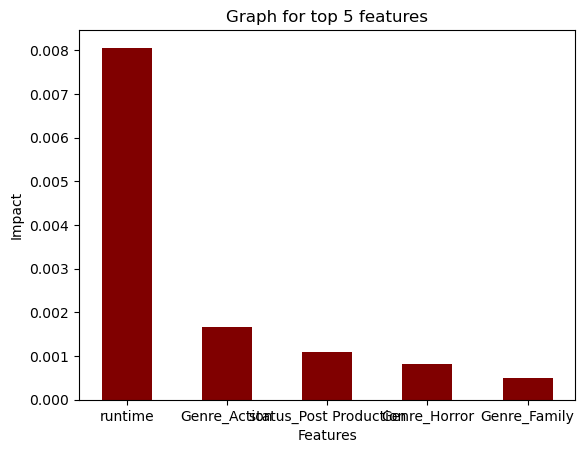

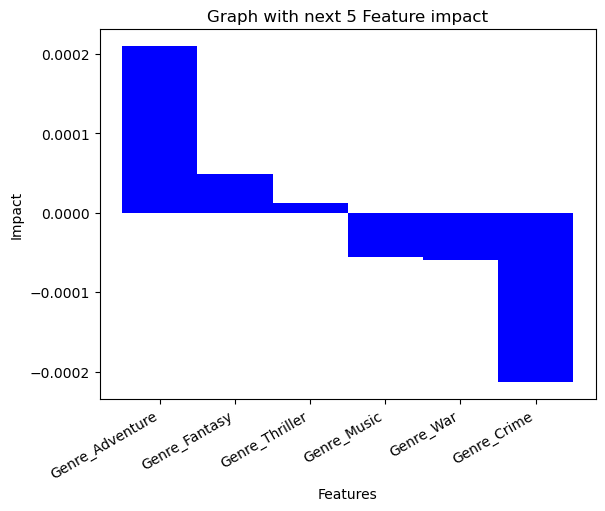

In [201]:
from matplotlib import pyplot as plt
import seaborn as sns
importance=(model.coef_)
print(type(importance))
top_20=[]
imp=[]
dic={}

for i in range(24):
    dic[cols[i]]=importance[0][i]
    imp.append(importance[0][i])
    #print(dic[cols[i]])
#for item in dic.items():
    #print(item)

sorted_dic = sorted(dic.items(), key=lambda x:x[1],reverse=True)
#for el in sorted_dic:
#    print(el)
c=0
top_5=[]
for el in sorted_dic:
    if c==5:
        break
    else:
        top_20.append(el)
        print(el)
    c+=1
    
    
top_7_12=[]
c=0
for el in sorted_dic:
    if c==12:
        break
    if(c>=6):
        top_7_12.append(el)
        print(el)
    c+=1
   
x_axis_new=[]
y_axis_new=[]

for i in range(len(top_7_12)):
    x_axis_new.append(top_7_12[i][0])
    y_axis_new.append(top_7_12[i][1])


x_axis=[]
y_axis=[]
#top_20[0][1]
for i in range(len(top_20)):
    x_axis.append(top_20[i][0])
    y_axis.append(top_20[i][1])
    
#fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x_axis, y_axis, color ='maroon',width = 0.5)
 
plt.xlabel("Features")
plt.ylabel("Impact")
plt.title("Graph for top 5 features")
plt.show()

plt.bar(x_axis_new, y_axis_new, color ='blue',
        width = 1)
 
plt.xlabel("Features")
plt.ylabel("Impact")
plt.title("Graph with next 5 Feature impact")
plt.xticks(rotation=30, ha='right')
plt.show()

### Making predictions on test set data

In [202]:
predictions = model.predict(x_test)
dep_var.describe()

,Popularity
count,13864.000000
mean,0.004242
std,0.012995
min,0.001117
25%,0.002181
50%,0.002590
75%,0.003632
max,1.000000


In [203]:
dep_var.head()

,Popularity
0,1.000000
1,0.359082
2,0.347121
3,0.324951
4,0.265287


### Graph on predictions and actual test set data

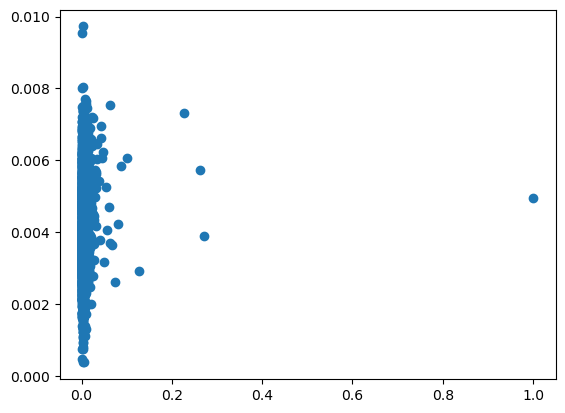

In [204]:
plt.scatter(y_test, predictions)

### Histogram on validation dataset and predictions made

(array([4.154e+03, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.00769683,  0.09257763,  0.19285209,  0.29312655,  0.39340101,
         0.49367547,  0.59394993,  0.69422439,  0.79449885,  0.89477331,
         0.99504777]),
 <BarContainer object of 10 artists>)

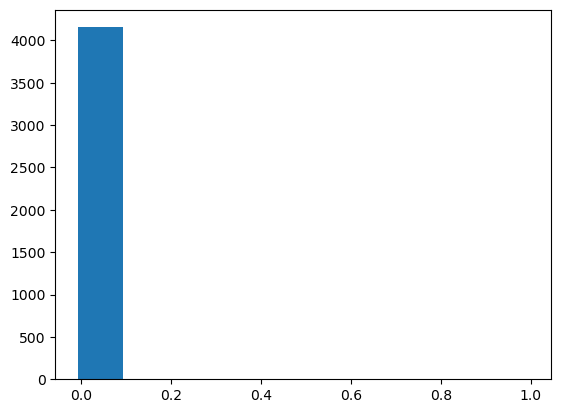

In [205]:
plt.hist(y_test - predictions)

### Feature Selection for our dataset

In [206]:
from sklearn.feature_selection import SelectFromModel

# #Selecting the Best important features according to Logistic Regression using SelectFromModel
sfm_selector = SelectFromModel(estimator=LinearRegression())
sfm_selector.fit(x_train, y_train)
x_train.columns[sfm_selector.get_support()]

Index(['runtime', 'Genre_Action', 'Genre_Documentary', 'Genre_Drama',
       'Genre_History', 'Genre_Western', 'status_Post Production'],
      dtype='object')